# Example 4.4

This is a marginal likelihood estimation example with
\begin{align}
p(y) = \int p(y|x) p(x) dx
\end{align}
where $p(y|x)$ is a Gaussian likelihood and $p(x)$ is a Gaussian prior. We will sample from $p(x)$ to estimate this integral and compare it to the true value.

0.16143422587153622


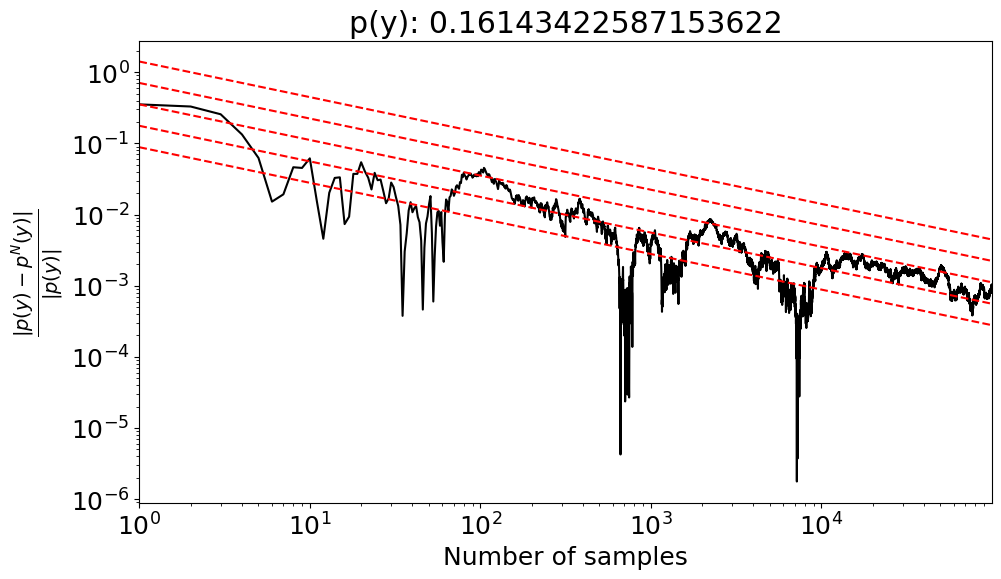

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def p(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

def lik(x, y, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-(x-y)**2/(2*sigma**2))

mu_0 = 0
sigma_0 = 1
sigma = 2
y = 1 # fixed data point

mu_marginal = mu_0 # analytically derived marginal distribution variance
var_marginal = sigma_0**2 + sigma**2 # analytically derived marginal distribution variance

ML_true = p(y, mu_marginal, np.sqrt(var_marginal)) # true value of the marginal likelihood

x = np.array([])

Err = np.array([])

fig = plt.figure(figsize=(11, 6))
ML_est = np.array([])

print('True marginal likelihood: ', ML_true)

N = 100000

for n in range(1, N):
    x = np.append(x, np.random.normal(mu_0, sigma_0, 1)) # sample from prior
    IS_estimate = np.sum(lik(x, y, (sigma)))/n # compute importance sampling estimate
    ML_est = np.append(ML_est, IS_estimate) # store estimate
    Err = np.append(Err, np.abs(ML_true - ML_est[n-1]))

plt.rcParams.update({'font.size': 18})
plt.loglog(np.arange(1, n+1), Err / np.abs(ML_true), 'k-')
plt.loglog(np.arange(1, n+1), Err[0] / np.abs(ML_true) * 1/np.sqrt(np.arange(1, n+1)), 'r--')
plt.loglog(np.arange(1, n + 1), Err[0] / np.abs(ML_true) * 1 / np.sqrt(np.arange(1, n + 1)) * 2.0, 'r--')
plt.loglog(np.arange(1, n + 1), Err[0] / np.abs(ML_true) * 1 / np.sqrt(np.arange(1, n + 1)) * 4.0, 'r--')
plt.loglog(np.arange(1, n + 1), Err[0] / np.abs(ML_true) * 1 / np.sqrt(np.arange(1, n + 1)) / 2.0, 'r--')
plt.loglog(np.arange(1, n + 1), Err[0] / np.abs(ML_true) * 1 / np.sqrt(np.arange(1, n + 1)) / 4.0, 'r--')
# plt.plot([0, n], [ML_true, ML_true], 'r--')
plt.xlabel('Number of samples')
plt.ylabel('$\\frac{|p(y) - p^N(y)|}{|p(y)|}$', fontsize=20)
plt.title('p(y): ' + str(ML_true))
# plt.ylim([0, 0.5])
plt.xlim([1, n])
plt.show()